# EDA

In [1]:
pwd

'C:\\Users\\Oreva'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Oreva/Desktop/lecture/retail_sales.csv', header=0)

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

### EDD

In [63]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Observation
- There are no missing values
- total amount and price per unit are negatively skewed because 75% are below 900 and 300 respectively
- No customer purchased from more than one product category

[Text(0, 0, '490'), Text(0, 0, '510')]

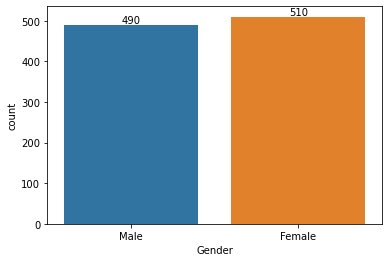

In [25]:
ax = sns.countplot(x='Gender',data=df)
ax.bar_label(ax.containers[0])

### Time series Analysis

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df['year'] = df['Date'].dt.to_period('Y')

In [32]:
df['year'].unique()

<PeriodArray>
['2023', '2024']
Length: 2, dtype: period[A-DEC]

In [70]:
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')

In [71]:
df['Month_Year'].unique()

array(['2023-11', '2023-02', '2023-01', '2023-05', '2023-04', '2023-03',
       '2023-12', '2023-10', '2023-08', '2023-09', '2023-06', '2023-07',
       '2024-01'], dtype=object)

In [97]:
# grouping sales by month

In [49]:
result = df.groupby('Month_Year').sum()

--- to arrange in order and save unque value

In [76]:
Months  = [month for month,df in df.groupby('Month_Year')]

In [77]:
print(Months)

['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01']


### Overall Sales Trend

Text(0.5, 0, 'Months')

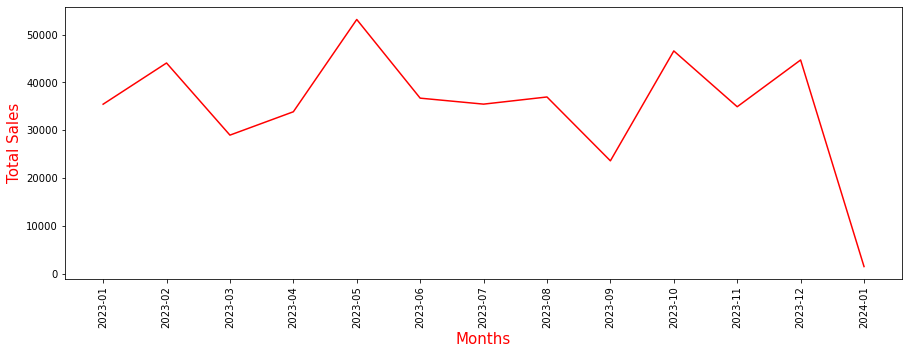

In [78]:
plt.figure(figsize=(15,5))
plt.plot(Months,result['Total Amount'],color = 'r')
plt.xticks(Months,rotation='vertical',size= 10)
plt.ylabel('Total Sales',size = 15,c='r')
plt.xlabel('Months',size=15,c='r')

In [63]:
result['Total Amount']

Month_Year
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Name: Total Amount, dtype: int64

In [79]:
sales_by_year =df.groupby('year')['Total Amount'].sum()

In [80]:
print(sales_by_year)

year
2023    454470
2024      1530
Freq: A-DEC, Name: Total Amount, dtype: int64


### Observation
- Sales fluctuate over time, with the peak and decline occurring Progressively.
- There was more sales in 2023 than 2024 as only sales of january was recorded for 2024


### Product Analysis

In [86]:
prod_sales = df.groupby('Product Category').sum()[['Quantity','Total Amount']]

In [87]:
prod_sales.head()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


In [95]:
prod_sales.sort_values(by=['Total Amount'],inplace=True,ascending=False)

In [96]:
prod_sales.head()

,Quantity,Total Amount
Product Category,,
Electronics,849,156905
Clothing,894,155580
Beauty,771,143515


In [98]:
category_count = df["Product Category"].value_counts()

Text(0.5, 1.0, 'Count of orders by product category')

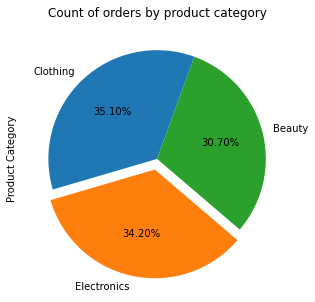

In [135]:
plt.figure(figsize=(10,5))
ex = (0,0.1,0)
category_count.plot.pie(autopct='%.2f%%',startangle = 70,explode=ex)
plt.title('Count of orders by product category', fontsize=12)

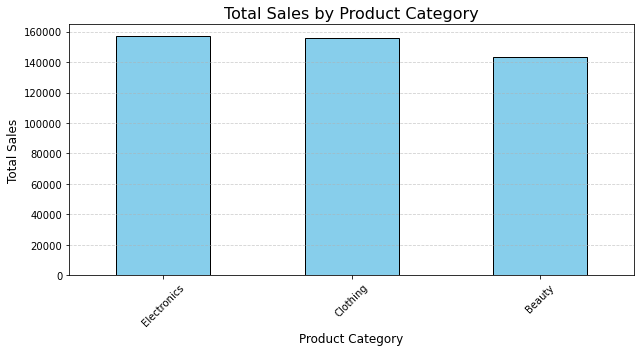

In [124]:
plt.figure(figsize=(9, 5))
product_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()



### Observation
- Electronics has the most sales.
- Electronics is also the most sold product.

### Customer Analysis

In [137]:
Cus_sales = df.groupby('Customer ID').sum()[['Quantity','Total Amount']]

In [141]:
Cus_sales.sort_values(by='Total Amount',ascending=False )

,Quantity,Total Amount
Customer ID,,
CUST487,4,2000
CUST476,4,2000
CUST773,4,2000
CUST503,4,2000
CUST093,4,2000
...,...,...
CUST309,1,25
CUST907,1,25
CUST285,1,25


In [142]:
print(Cus_sales)

             Quantity  Total Amount
Customer ID                        
CUST001             3           150
CUST002             2          1000
CUST003             1            30
CUST004             1           500
CUST005             2           100
...               ...           ...
CUST995             1            30
CUST996             1            50
CUST997             3            90
CUST998             4           100
CUST999             3           150

[1000 rows x 2 columns]


### Observation
- There is no returning customer

### Overall Recommendation
- The store should focus on customer satisfaction because overtime there was no history of returning customers
- ncreased knowledge of product availability and excellent customer service are necessary to boost sales and prevent fluctuations.